<a href="https://www.kaggle.com/code/davidcoxon/comparing-vda-options-for-2023-playground-3-data?scriptVersionId=126946975" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# About the competition

This Notebook relates to the third in the 2023 Playground Series, the playgroud series is a design for beginner to get used to work with different types of data. There are no Kaggle competition points awarded and the competition does not count towards kaggle tiers.

This is a categorisation problem, using a dataset with 64 binary features.

# About the data

The dataset for this competition (both train and test) were generated from a deep learning model trained on the Vector Borne Disease Prediction dataset. 
Feature distributions are close to, but not exactly the same, as the original.

The dataset contains, all symptoms and Prognosis associated with 11 Vector Borne Diseases.

• 66 columns.
• first column is the disease ID, and the last is the prognosis.
• 64 of the colummns contain binary data, each relates to a possible symptom of disease and whether its present or not. 

• 707 rows of training data
• 303 of test data.

# About the notebook

This notebook aims to perform visual data exploration of the data within the dataset to get some insights into the data.

The notebook was created by @davidcoxon in mid April, 2023. Where inspation (or code) has come from other Kaggle notebooks the source will be commented out in the code, sources will also be creditted at the bottom of the notebook. If you like the notebook please upvote, and where appropriate upvote any source code. Feel free of clone the notebook, or copy code snippets but please credit in your notebook if you use it. 

# Get libraries and set parameters

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import math #maths
import matplotlib.pyplot as plt #plotting
import seaborn as sns #plotting
import datetime as dt #datetime
import datetime #datetime
import warnings #system config
import os #system config

print('Libraries loaded')

#settings
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 1200)
pd.set_option('display.width', 1200)
warnings.filterwarnings("ignore")
%matplotlib inline

#variables
colour=['maroon','r','g','darkgreen','c','teal','b','navy','indigo','m','deeppink','orange','sienna','yellow','khaki','olive','tan','black','grey','brown']
blues=['aliceblue','lightcyan','lightblue','lightskyblue','skyblue','deepskyblue','dodgerblue','steelblue','blue','mediumblue','navy']

print('Parameters set')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Libraries loaded
Parameters set
/kaggle/input/playground-series-s3e13/sample_submission.csv
/kaggle/input/playground-series-s3e13/train.csv
/kaggle/input/playground-series-s3e13/test.csv


# Get data

In [2]:
# import all files in Data folder and read into dataframes
dataframes=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file=filename.split('.')
        file=((file[0]+"_df"))
        if file !="_df":
            filepath=os.path.join(dirname,filename)
            df=pd.read_csv(filepath,sep=",",encoding = "UTF-8")
            exec(f'{file} = df.copy()')
            print(file, df.shape)
            dataframes.append(df)
print('Data imported')

sample_submission_df (303, 2)
train_df (707, 66)
test_df (303, 65)
Data imported


# Examine the data type

In [3]:
print(train_df.info())
#print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     707 non-null    int64  
 1   sudden_fever           707 non-null    float64
 2   headache               707 non-null    float64
 3   mouth_bleed            707 non-null    float64
 4   nose_bleed             707 non-null    float64
 5   muscle_pain            707 non-null    float64
 6   joint_pain             707 non-null    float64
 7   vomiting               707 non-null    float64
 8   rash                   707 non-null    float64
 9   diarrhea               707 non-null    float64
 10  hypotension            707 non-null    float64
 11  pleural_effusion       707 non-null    float64
 12  ascites                707 non-null    float64
 13  gastro_bleeding        707 non-null    float64
 14  swelling               707 non-null    float64
 15  nausea

# First look at test and training data

The following 2 sets of graphs show the distribution of different within the training data set. 

The second set of graphs included slightly more detail, but essentially the difference is in the styling of the results. While the second graphs look a little more interesting the use a bit more code and required more resource/time to run. 

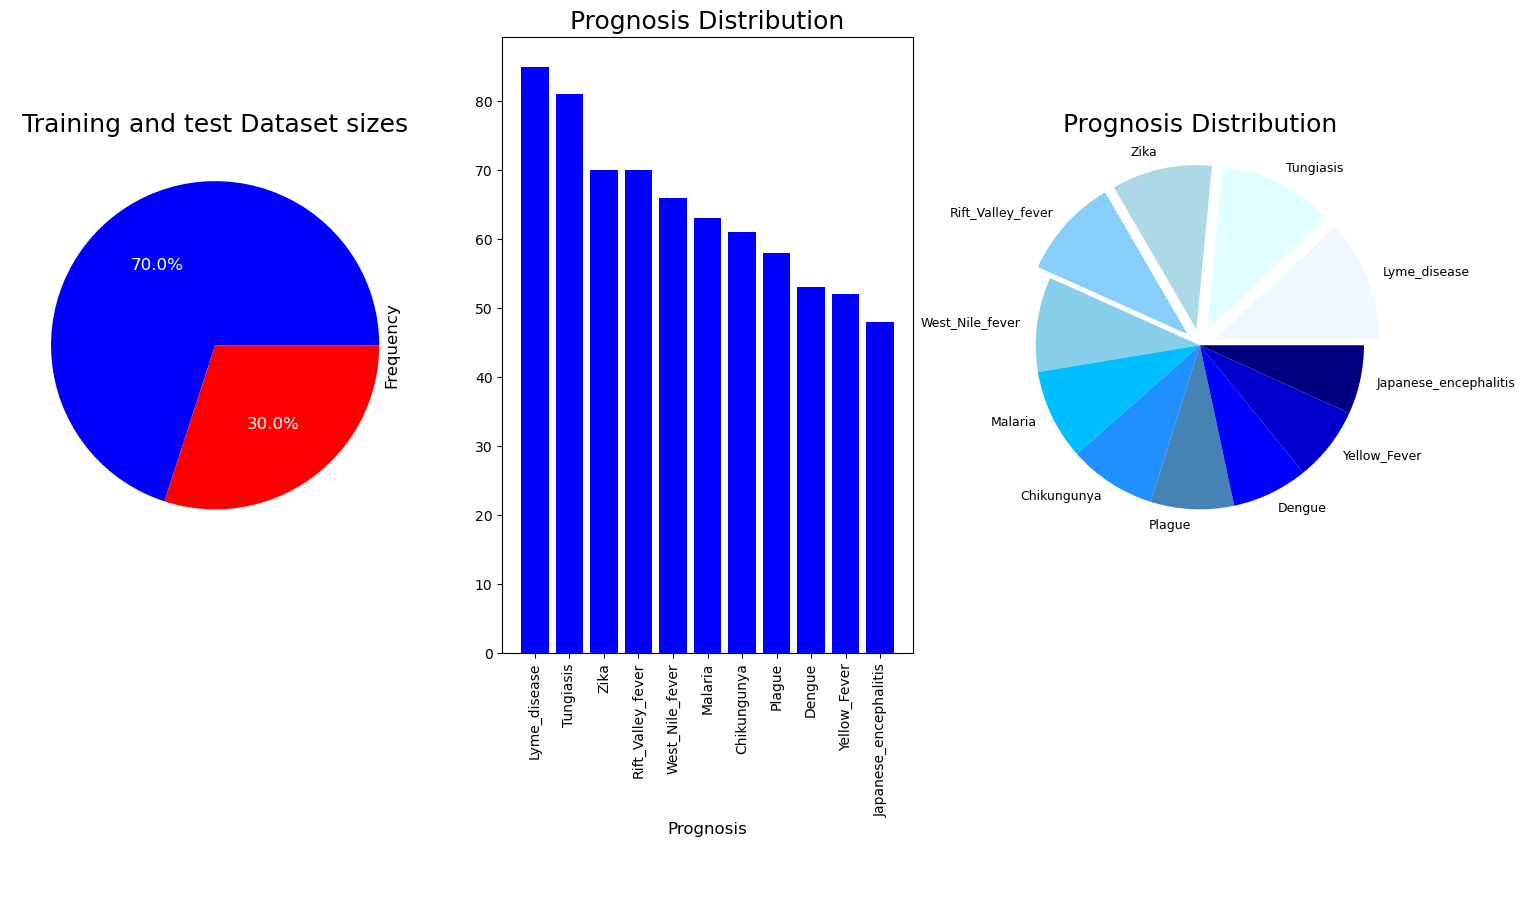

CPU times: user 663 ms, sys: 261 ms, total: 924 ms
Wall time: 581 ms


In [4]:
%%time

# Create grid
f = plt.figure(figsize=(18,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(133)

# plot the distibution of prognosis pie chart
plt.subplot(1, 3, 1) 
plt.pie([len(train_df), len(test_df)], 
        labels=['train', 'test'],
        colors=['blue', 'red'],
        textprops={'fontsize': 12, 'color' : 'white',},
        autopct='%1.1f%%')
plt.title(f'Training and test Dataset sizes', ha='center', fontsize=18)

# plot the number size of training versus test dataset
plt.subplot(1, 3, 2) 
plt.bar(pd.Series(range(1,12)),train_df['prognosis'].value_counts(),color='b')
plt.xticks(np.arange(1,12),train_df['prognosis'].unique(),rotation=90)
plt.xlabel(f'Prognosis\n\n\n\n', ha='center', fontsize=12)
plt.ylabel(f'Frequency\n\n\n\n', ha='center', fontsize=12)
plt.title(f'Prognosis Distribution', ha='center', fontsize=18)

# plot dostribution of prognosis in dataset
explode = (0.1, 0.1, 0.1,0.1,0,0,0,0,0,0,0)
plt.subplot(1, 3, 3)
plt.pie(train_df['prognosis'].value_counts(),textprops={'fontsize': 9, 'color' : 'black',},explode=explode,colors=blues, labels=train_df['prognosis'].unique())
plt.title(f'Prognosis Distribution', ha='center', fontsize=18)
#plt.legend(loc='lower center')

plt.show()

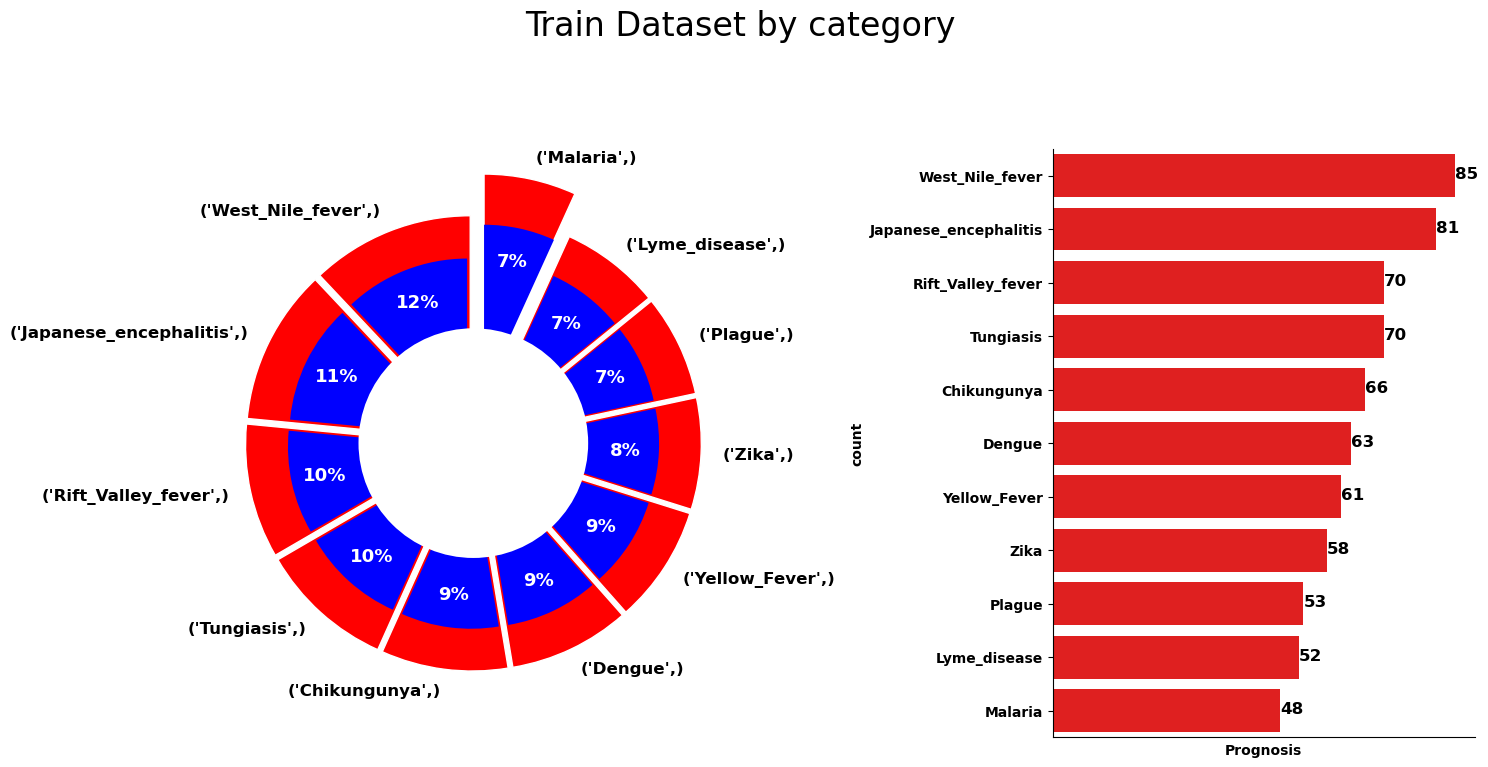

CPU times: user 885 ms, sys: 300 ms, total: 1.18 s
Wall time: 699 ms


In [5]:
%%time

# This is a very nice visual @sergiosaharovskiy 

def plot_count(df: pd.core.frame.DataFrame, col_list: list, title_name: str='Train') -> None:
    """Draws the pie and count plots for categorical variables.
    
    Args:
        df: train or test dataframes
        col_list: a list of the selected categorical variables.
        title_name: 'Train' or 'Test' (default 'Train')
        
    Returns:
        subplots of size (len(col_list), 2)
    """
    f, ax = plt.subplots(len(col_list), 2, figsize=(15, 8))
    plt.subplots_adjust(wspace=0)
    
    s1 = df[col_list].value_counts()
    N = len(s1)
    outer_sizes = s1
    inner_sizes = s1/N
    outer_colors = "r" * N
    inner_colors = "b" * N

    ax[0].pie(
        outer_sizes,colors=outer_colors, 
        labels=s1.index.tolist(), 
        startangle=90,frame=True, radius=1.3, 
        explode=([0.05]*(N-1) + [.3]),
        wedgeprops={ 'linewidth' : 1, 'edgecolor' : 'white'}, 
        textprops={'fontsize': 12, 'weight': 'bold'}
    )

    textprops = {
        'size':13, 
        'weight': 'bold', 
        'color':'white'
    }

    ax[0].pie(
        inner_sizes, colors=inner_colors,
        radius=1, startangle=90,
        autopct='%1.f%%',explode=([.1]*(N-1) + [.3]),
        pctdistance=0.8, textprops=textprops
    )

    center_circle = plt.Circle((0,0), .68, color='black', 
                               fc='white', linewidth=0)
    ax[0].add_artist(center_circle)

    order = s1.index.get_level_values(0).tolist()
    sns.countplot(
        y=df[col_list[0]], ax=ax[1],
       orient='horizontal',  order=order, color='r'
    )

    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].tick_params(
        axis='x',         
        which='both',      
        bottom=False,      
        labelbottom=False
    )

#     barchart  
    for i, v in enumerate(s1):
        ax[1].text(v, i+0.05, str(v), color='black', 
                     fontweight='bold', fontsize=12)

#     plt.title(col_list)
    plt.setp(ax[1].get_yticklabels(), fontweight="bold")
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    ax[1].set_xlabel('Prognosis', fontweight="bold", color='black')
    ax[1].set_ylabel('count', fontweight="bold", color='black')

    f.suptitle(f'{title_name} Dataset by category', fontsize=24)
    plt.tight_layout()    
#     plt.savefig('data/plot_count.png')
    plt.show()
plot_count(train_df, ['prognosis'], 'Train')

# Compare training and test feature distributions

The following 2 sets of visualisations will look at the distribution of features within the dataset. Each feature is a binary feature, and there are 2 reasons to look at the this, the first is to see in the test and training database are consistent, the second is to get an idea of how many features there are and how unique these may be. 

The first is a quite simple visual, its pretty easy to see how many features there are, and how similar the 2 datasets are.The second visualization looks far more complex its harder to get an idea of the overall picture, but its much easier to see how well the test and training distributions compare for each individual feature and to see how the comparison between case with and without that symptom. 

There isn't much difference in the amount of code needed to create each of the visuals, but the second set of visuals take 3 times longer to execute.

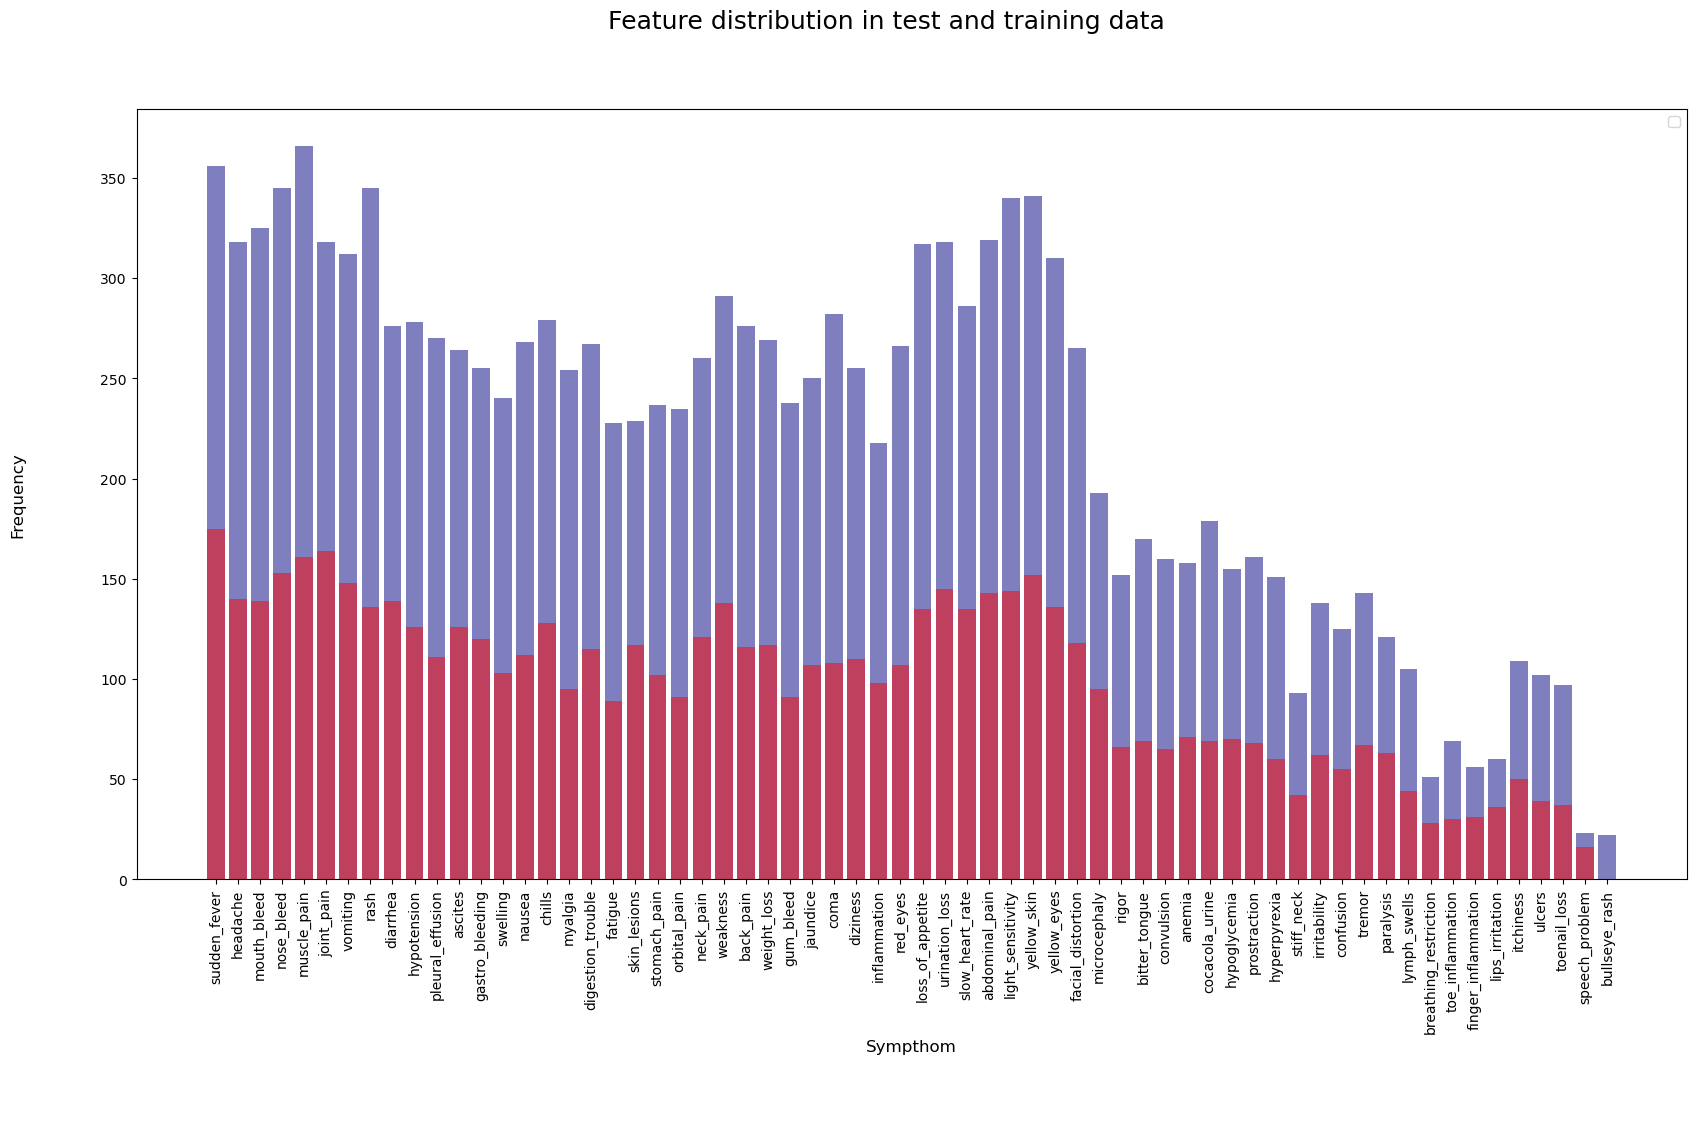

CPU times: user 1.27 s, sys: 257 ms, total: 1.53 s
Wall time: 1.29 s


In [6]:
%%time

# create dataframe with sum of each feature
sum_train_df=((train_df).sum(axis=0)[1:-1])
sum_test_df=((test_df).sum(axis=0)[1:-1])

# plot the sum of each feature
f, ax = plt.subplots(figsize=(20, 10))

plt.bar((pd.Series(range(1,len(sum_train_df)+1))),sum_train_df.values,color='navy',alpha=0.5)
plt.bar((pd.Series(range(1,len(sum_test_df)+1))),sum_test_df.values,color='red',alpha=0.5)

plt.xticks(np.arange(1,len(sum_train_df)+1),sum_train_df.index.tolist(),rotation=90)
plt.suptitle(f'Feature distribution in test and training data', ha='center', fontsize=18)
plt.xlabel(f'Sympthom\n\n\n\n', ha='center', fontsize=12)
plt.ylabel(f'Frequency\n\n\n\n', ha='center', fontsize=12)
plt.legend()
plt.show()

CPU times: user 4.9 s, sys: 325 ms, total: 5.22 s
Wall time: 4.74 s


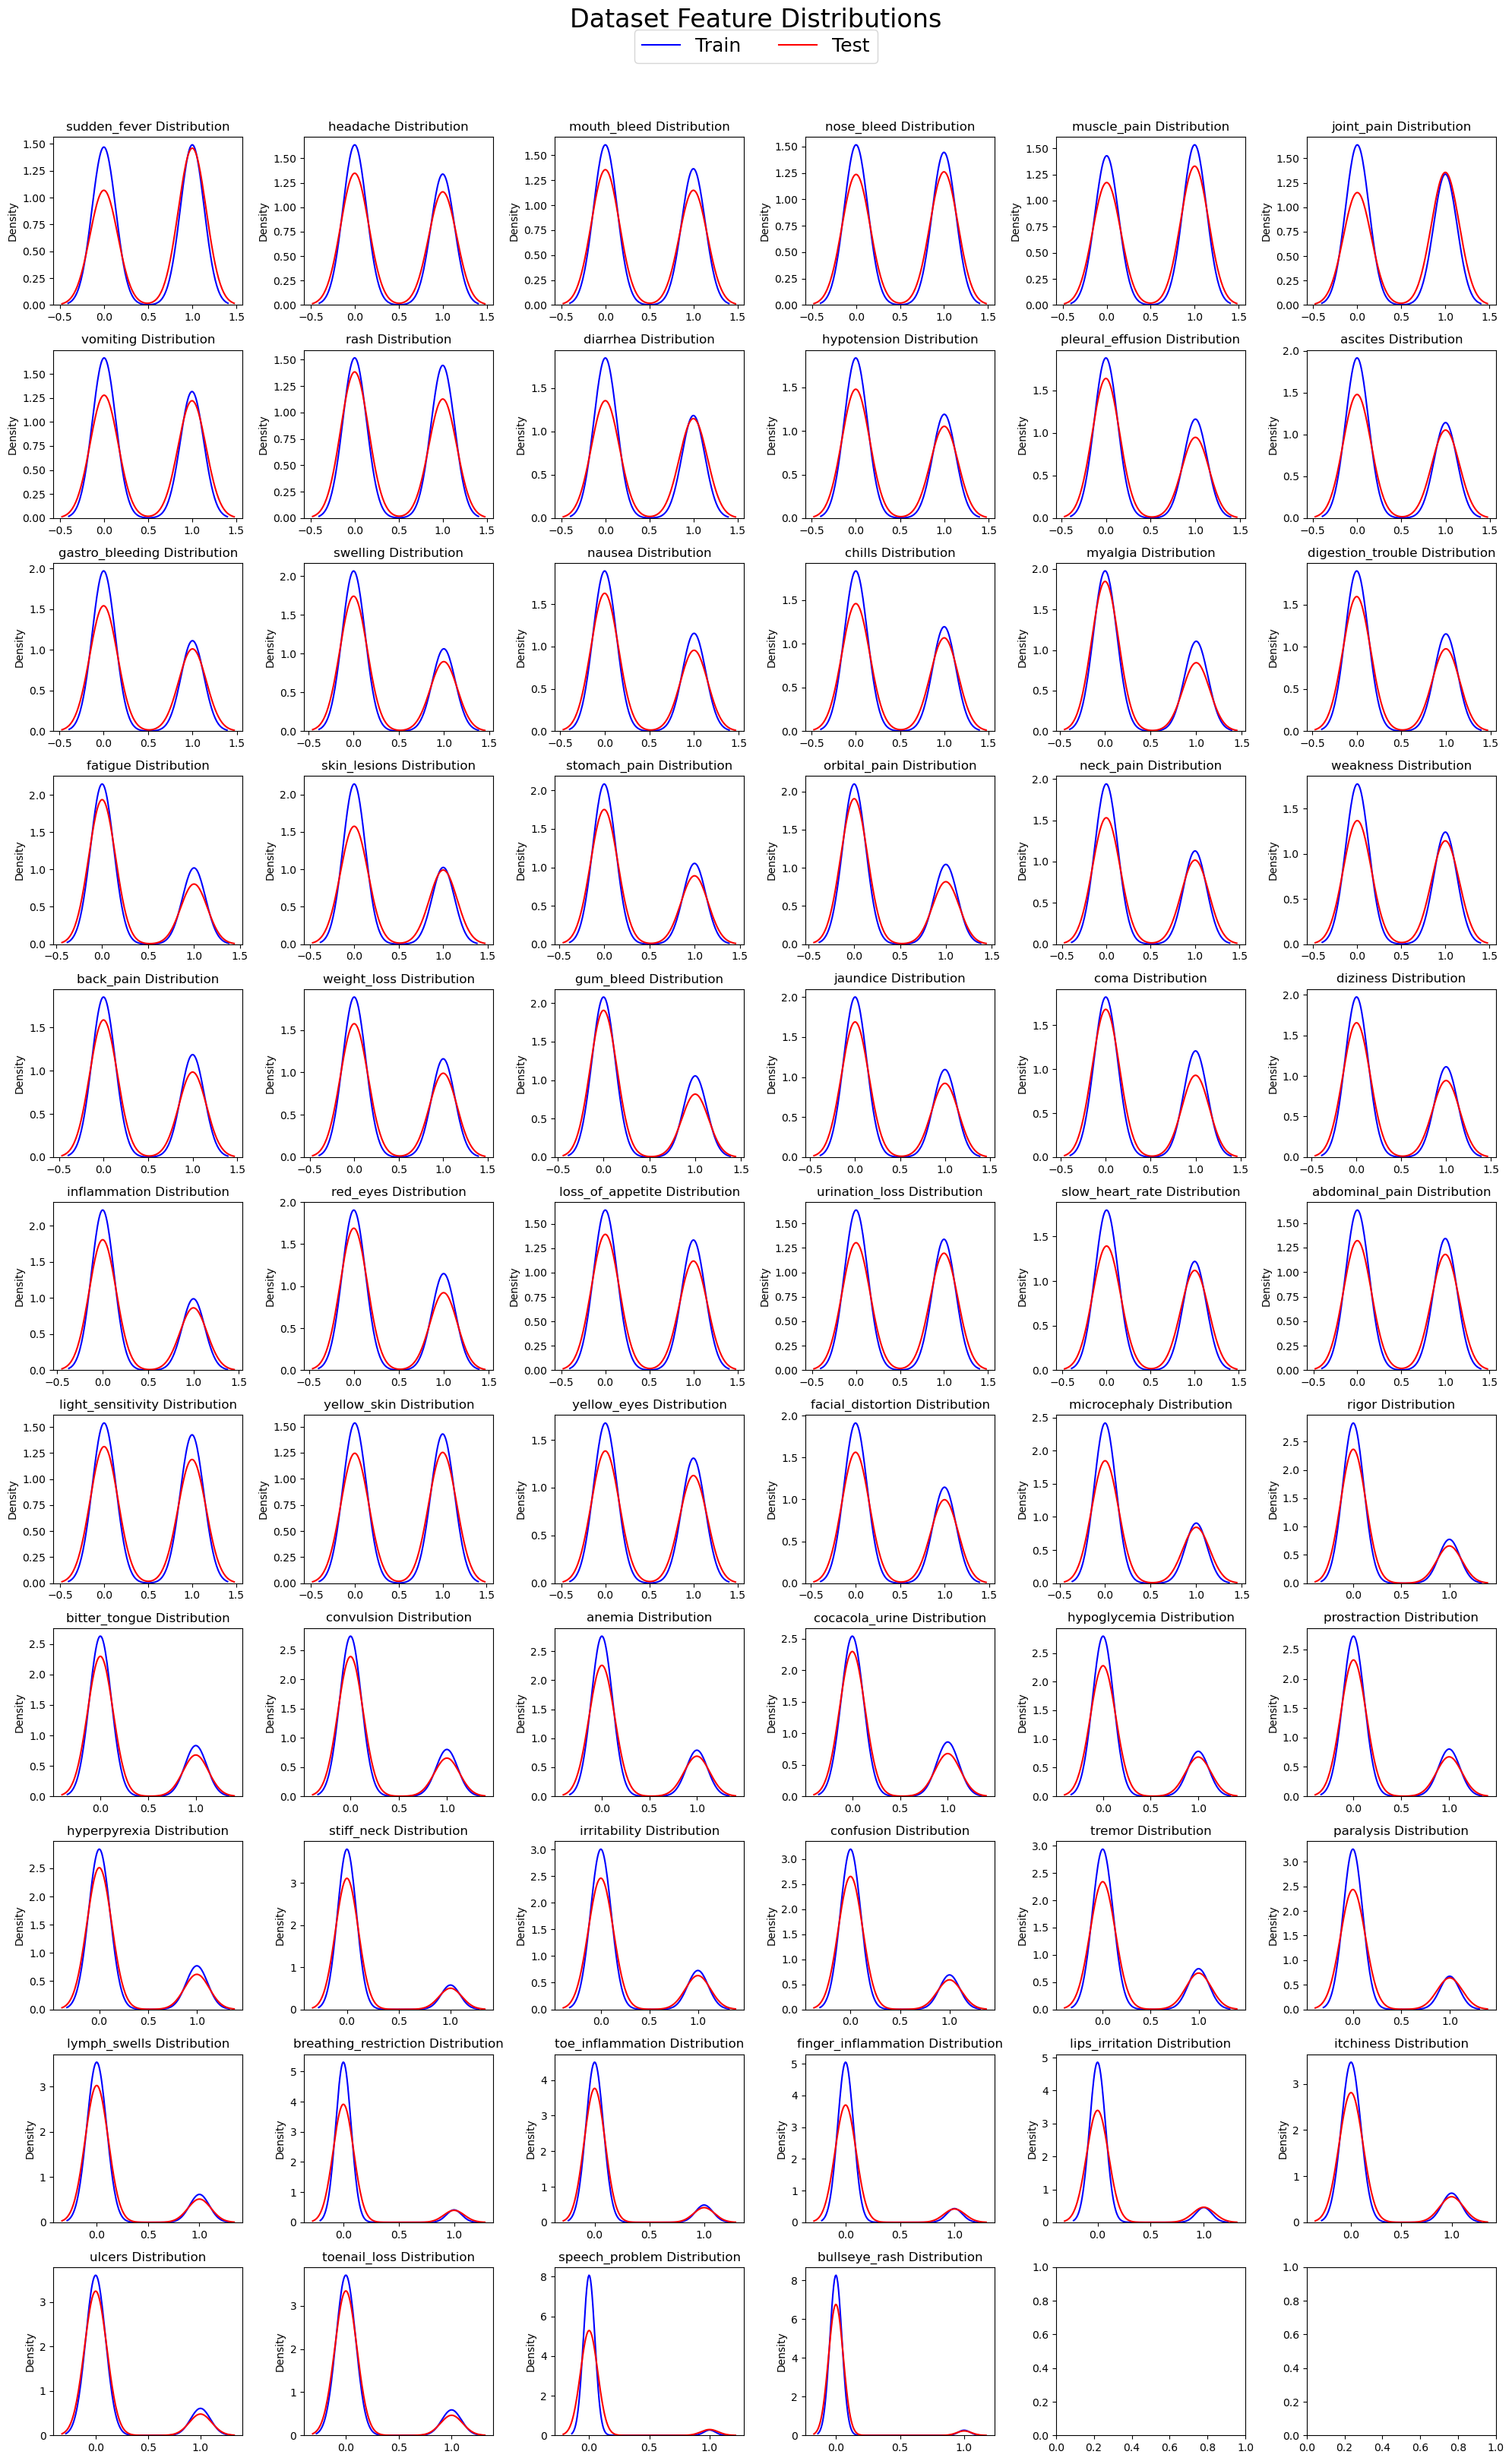

In [7]:
%%time

# kudos to @jcaliz and @sergiosaharovskiy

features = (train_df.columns)[1:-1] #select columns to be used
n_bins = 10 #set number of bins
n_cols = 6 #set number of bins
n_rows = math.ceil(len(features)/n_cols) # set number of rows
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*3))
ax = ax.flatten()

for i, column in enumerate(features):
    #plot distributions
    plot_axes = [ax[i]]
    sns.kdeplot(
        train_df[column], label='Train',
        ax=ax[i], color='b')
    
    sns.kdeplot(
        test_df[column], label='Test',
        ax=ax[i], color='r')
    
    # titles
    ax[i].set_title(f'{column} Distribution');
    ax[i].set_xlabel(None)
    
    # remove axes to show only one at the end
    plot_axes = [ax[i]]
    handles = []
    labels = []
    for plot_ax in plot_axes:
        handles += plot_ax.get_legend_handles_labels()[0]
        labels += plot_ax.get_legend_handles_labels()[1]
        plot_ax.legend().remove()

# title plot
fig.suptitle(f'Dataset Feature Distributions\n\n\n\n', ha='center', fontsize=24)
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.975), fontsize=18, ncol=3)
plt.tight_layout()

## Observations on data distributions

Generally the distribution of the data in the test dataset reflects the distribution in the training dataset. There are small difference but this is likely to be because the data is a synthetic data set.

# Distribution of features by disease

The ability to classify diseases based on the symptoms will depend on how distinct each set of symptoms is to a particular disease. We can be plot the distribution of symptoms for each disease by summing the features for each different disease in the training dataset.We will need to take into account the number of cases of each individual disease in the dataset to ensure that we get comparable plots for each.

Again we have 2 visualisations, both use very similar code, the difference being whether the plt.show is inside or outside of the for loop. The first visual shows all of the different line plot on 1 chart, this is quite a choatic visual, it indicates show that many of the symptoms exist for a range of diseases, but there are a few features that are relatively unique. The second set of visuals shows each disease on its own bar plot. This is a bit less chaotic, and makes it easier to see the different profiles of symptoms for each disease. The labels are quite difficult to see and its difficult to see the individual symptoms without really zooming in.

The second visualisation took almost 10 times longer to run.

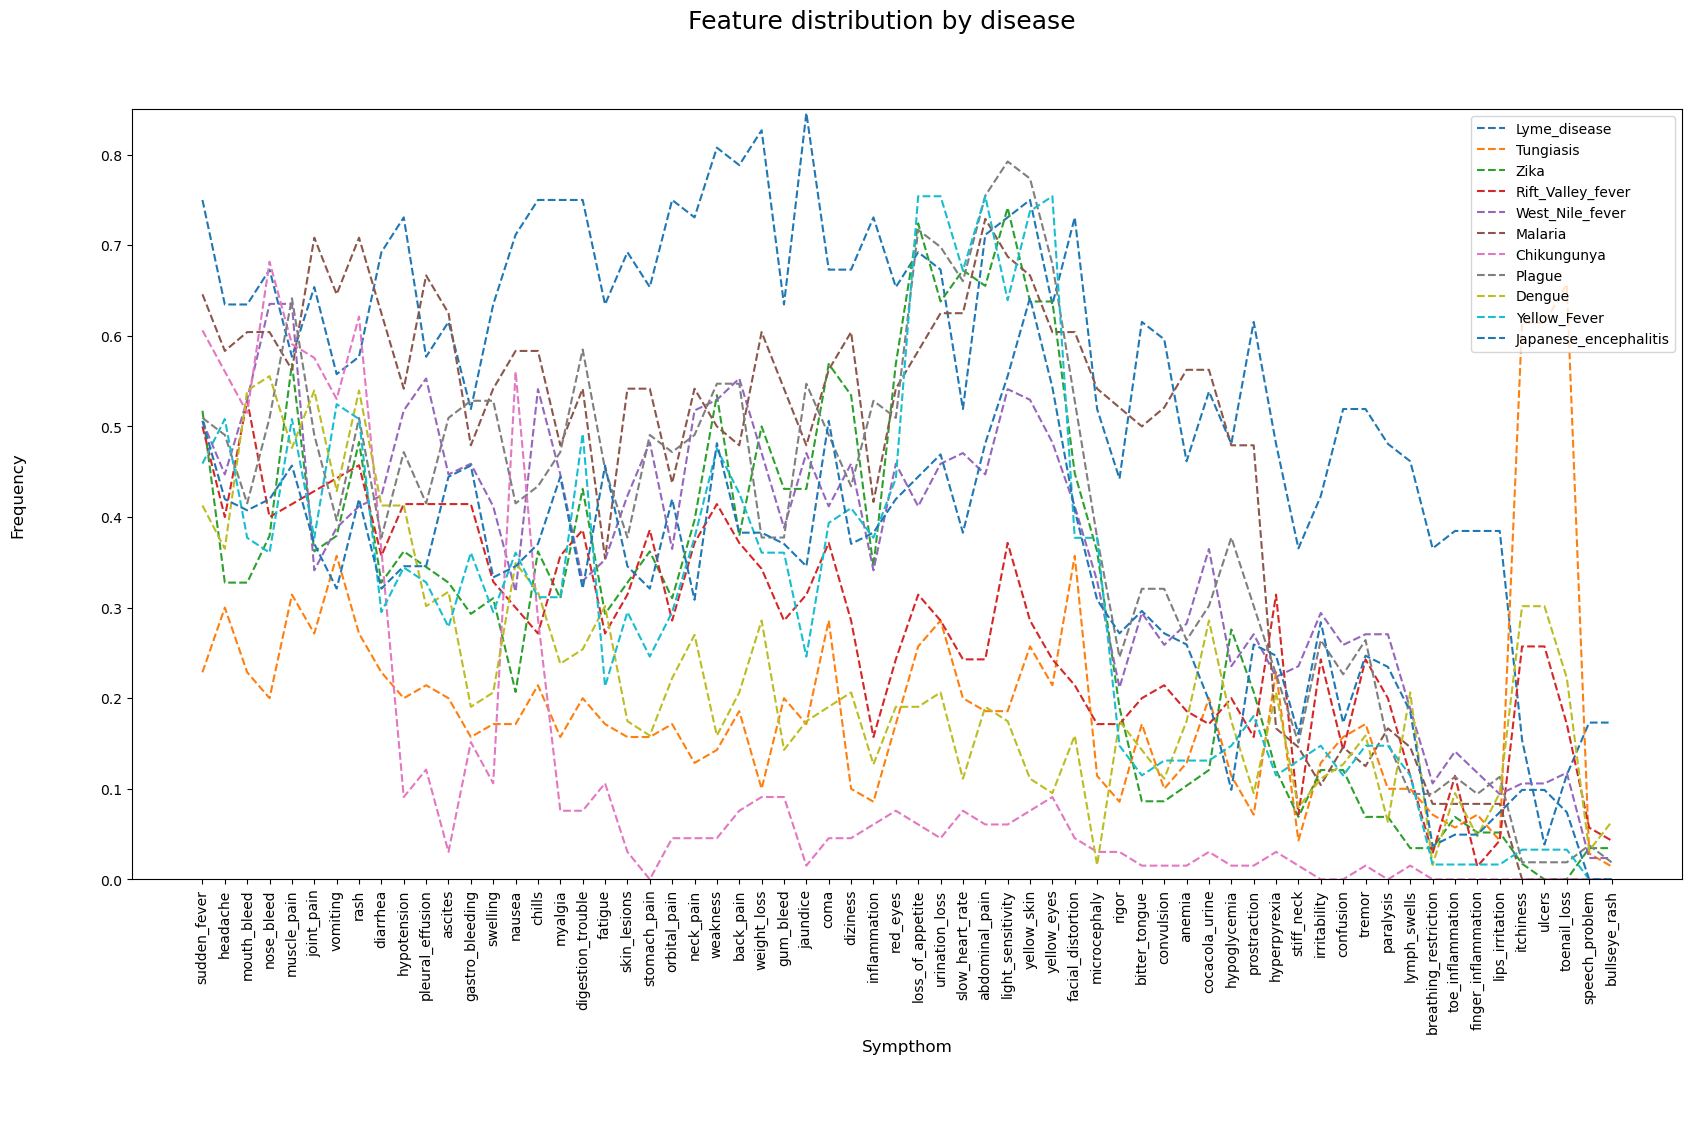

CPU times: user 1.43 s, sys: 246 ms, total: 1.68 s
Wall time: 1.44 s


In [8]:
%%time

#list diseases
diseases=train_df['prognosis'].unique()
# create dataframe with sum of each feature
sum_train_df=((train_df).sum(axis=0)[1:-1])

# plot the sum of each feature for each disease
f, ax = plt.subplots(figsize=(20, 10))
for disease in diseases:
    disease_df=train_df[train_df['prognosis']== disease]
    diseasecount=disease_df.shape[0]
    sum_disease_df=((disease_df).sum(axis=0)[1:-1])
    plt.plot((pd.Series(range(1,len(sum_disease_df)+1))),sum_disease_df.values/diseasecount,alpha=1,ls='--',label=disease)
plt.xticks(np.arange(1,len(sum_disease_df)+1),sum_disease_df.index.tolist(),rotation=90)
plt.suptitle(f'Feature distribution by disease', ha='center', fontsize=18)
plt.xlabel(f'Sympthom\n\n\n\n', ha='center', fontsize=12)
plt.ylabel(f'Frequency\n\n\n\n', ha='center', fontsize=12)
plt.ylim(0,0.85)
plt.legend()
plt.show()

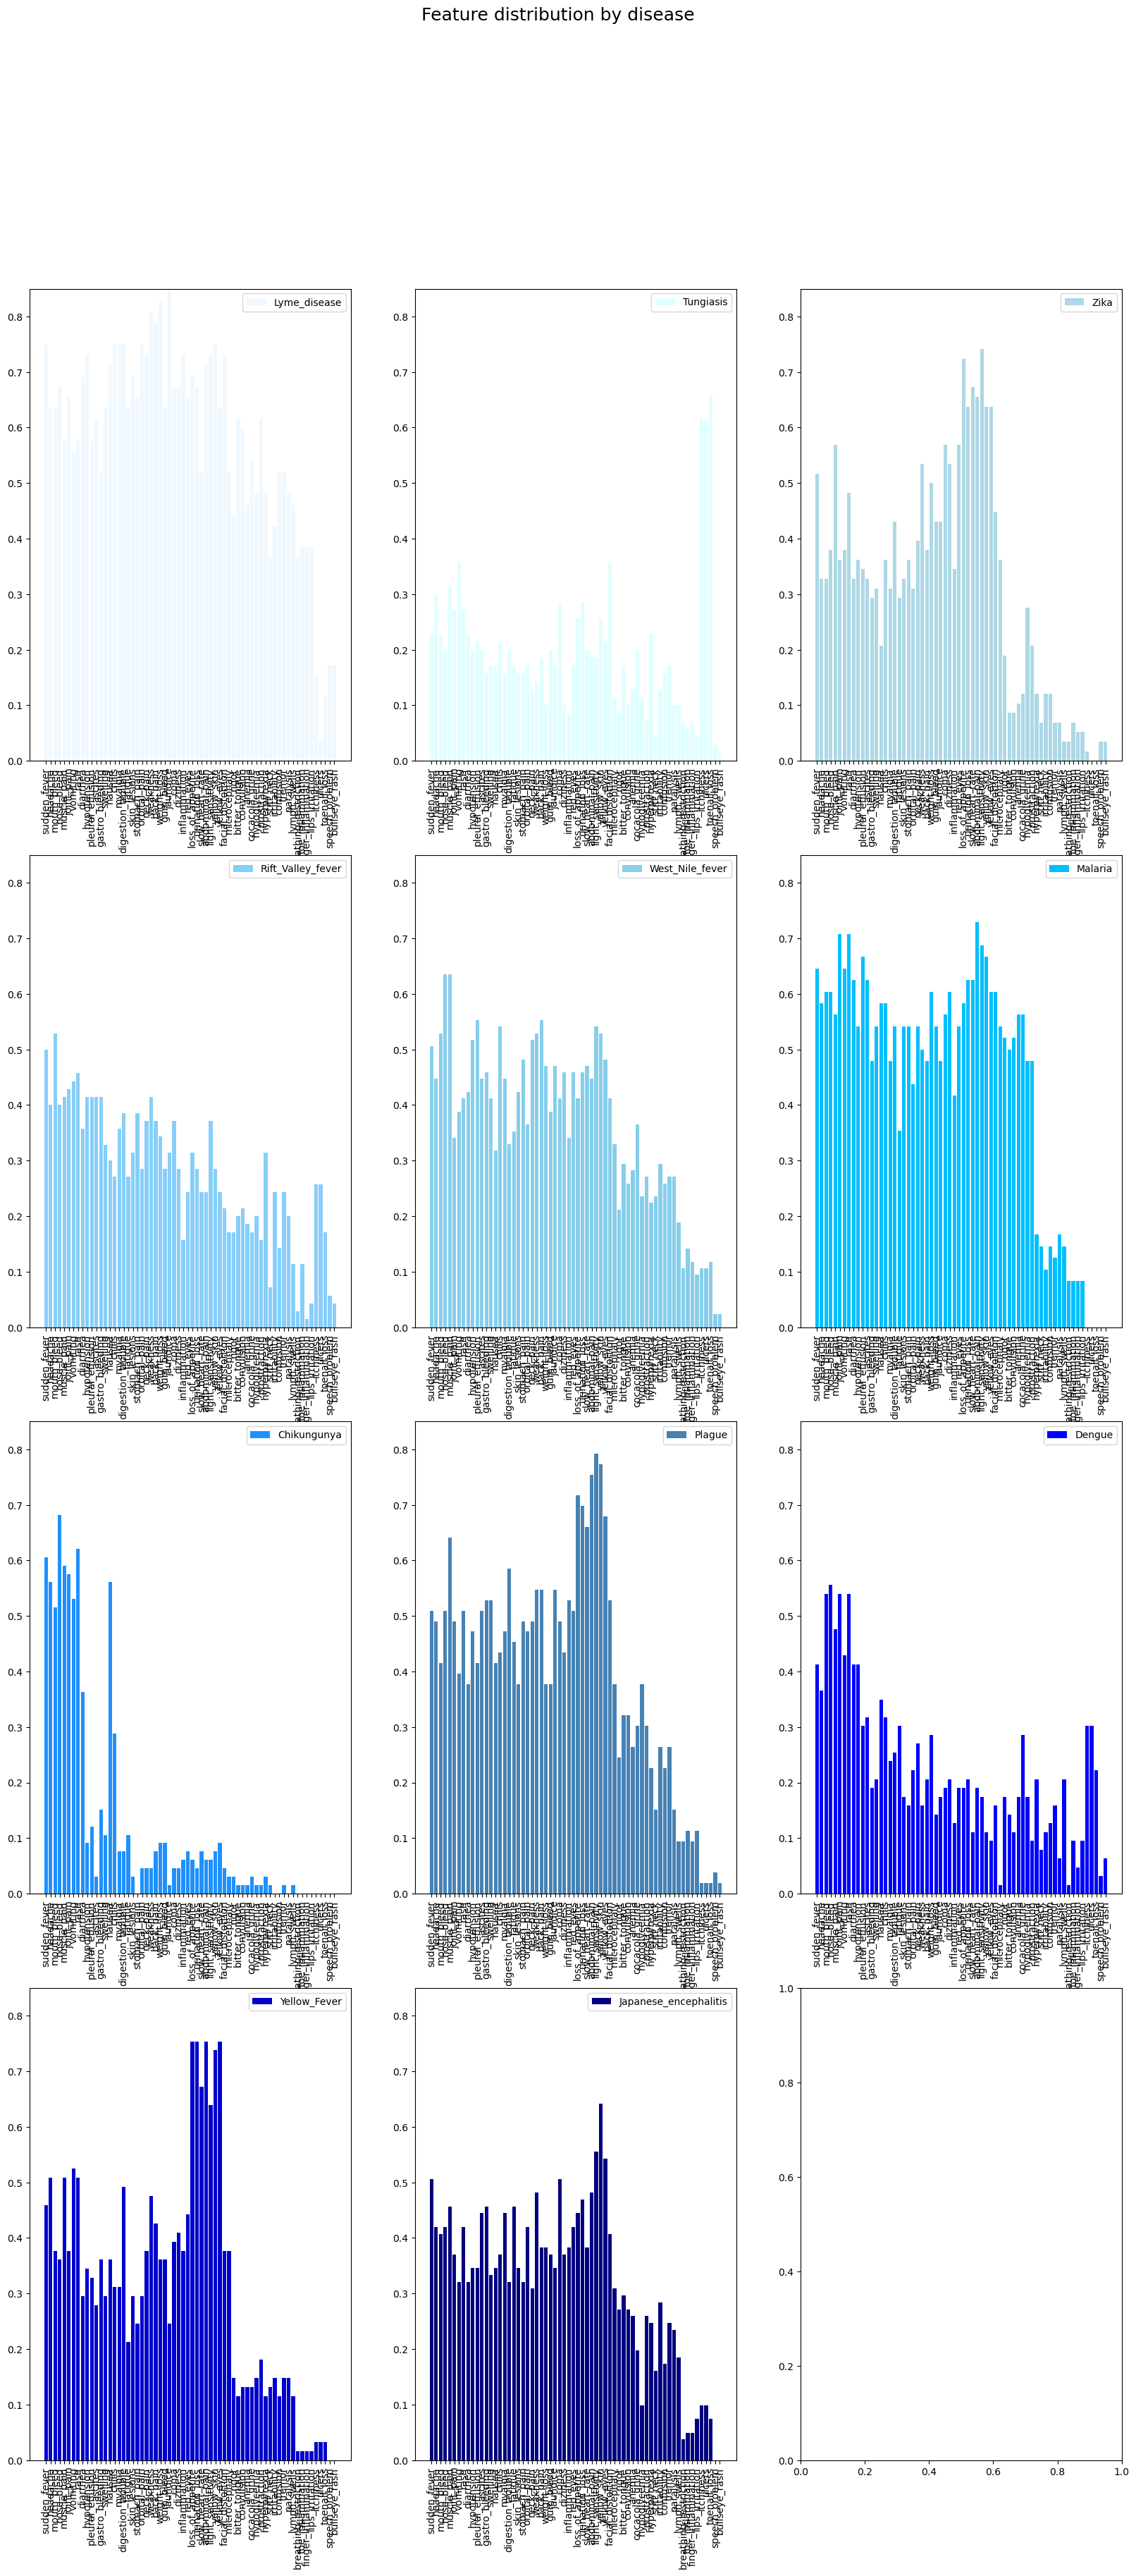

CPU times: user 10.2 s, sys: 1.06 s, total: 11.2 s
Wall time: 11 s


In [9]:
%%time

#list diseases
diseases=train_df['prognosis'].unique()

# create dataframe with sum of each feature
sum_train_df=((train_df).sum(axis=0)[1:-1])

# Create grid
n_cols = 3
n_rows = math.ceil(len(diseases)/n_cols) # set number of rows
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*10))
ax = ax.flatten()

# plot the sum of each feature for each disease
#f, ax = plt.subplots(figsize=(20, 20))

n=1
for disease in diseases:
    disease_df=train_df[train_df['prognosis']== disease]
    diseasecount=disease_df.shape[0]
    sum_disease_df=((disease_df).sum(axis=0)[1:-1])
    plt.subplot(n_rows, n_cols, n) 
    plt.bar((pd.Series(range(1,len(sum_disease_df)+1))),sum_disease_df.values/diseasecount,alpha=1,ls='--',label=disease,color=blues[n-1])
    plt.xticks(np.arange(1,len(sum_disease_df)+1),sum_disease_df.index.tolist(),rotation=90)
    plt.suptitle(f'Feature distribution by disease', ha='center', fontsize=18)
    #plt.xlabel(f'Sympthom\n\n\n\n', ha='center', fontsize=12)
    #plt.ylabel(f'Frequency\n\n\n\n', ha='center', fontsize=12)
    plt.ylim(0,0.85)
    plt.legend()
    n=n+1
plt.show()

# Correlation of Features

Lets look at the correlation of features next. The dataset contains 64 features, each relating to a separate symptoms associated with disease. Any correlations between features looking at the whole dataset would indicate that those symptoms always go hand in hand (or are never seen together), no matter what the disease. As the dataset contains information on all 11 disease, each with it's own set of symptoms, its unlikely that we'll see any correlations.

If we filter out individual diseases within the dataset its more likely that we will start to see correlations within the data.

CPU times: user 1.68 s, sys: 384 ms, total: 2.07 s
Wall time: 1.58 s


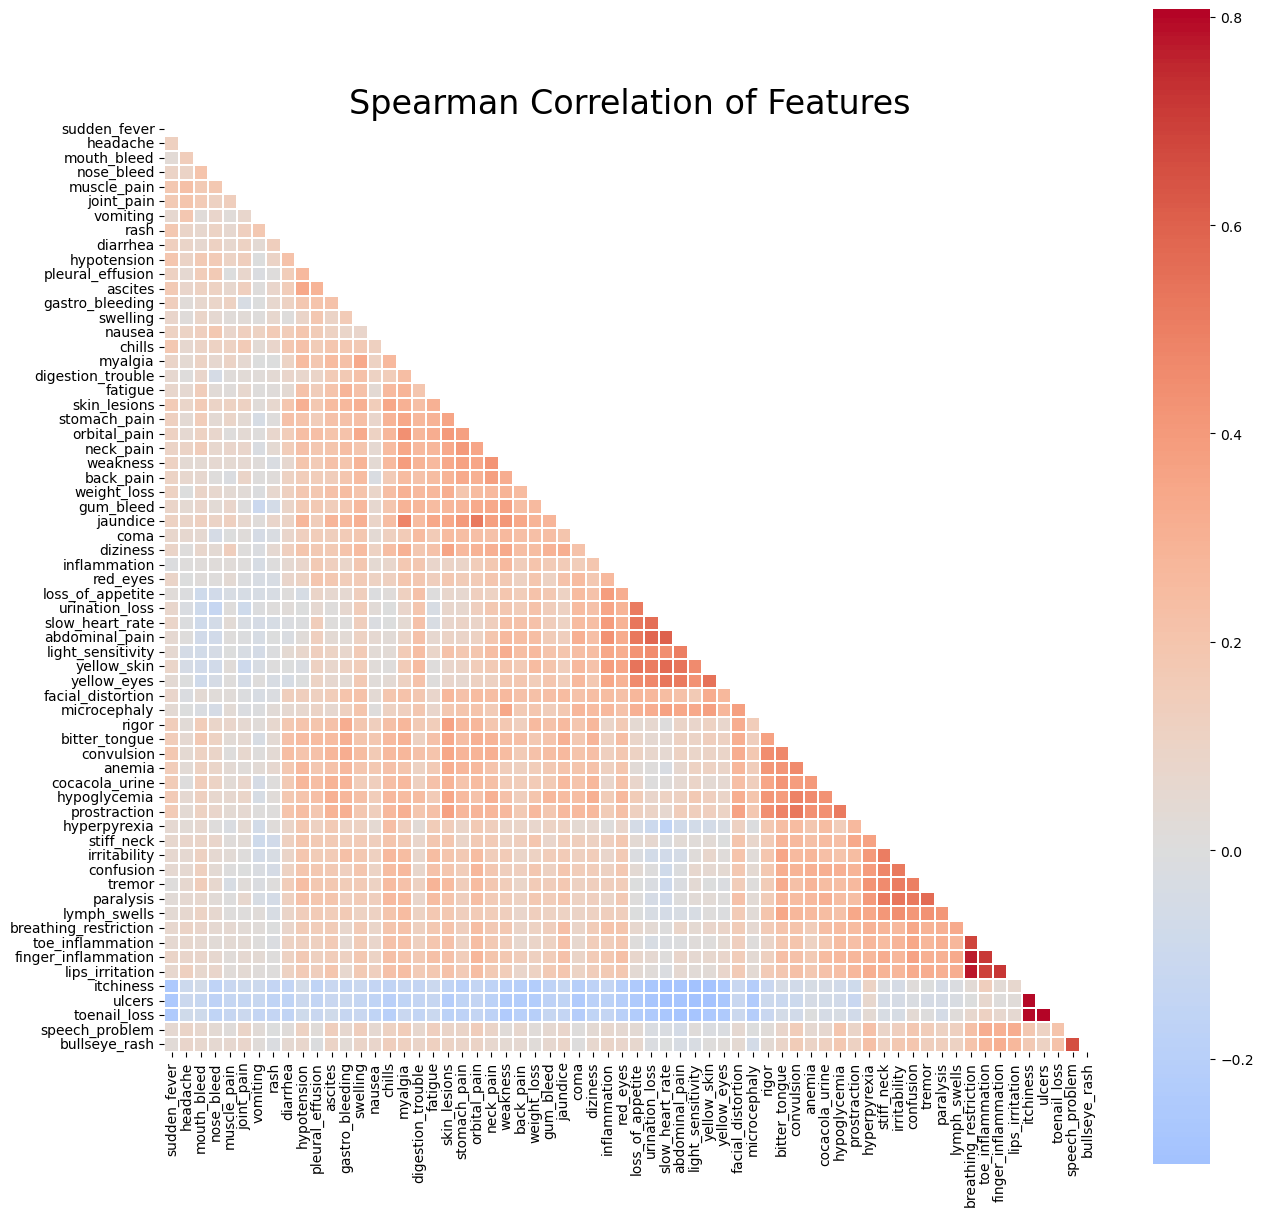

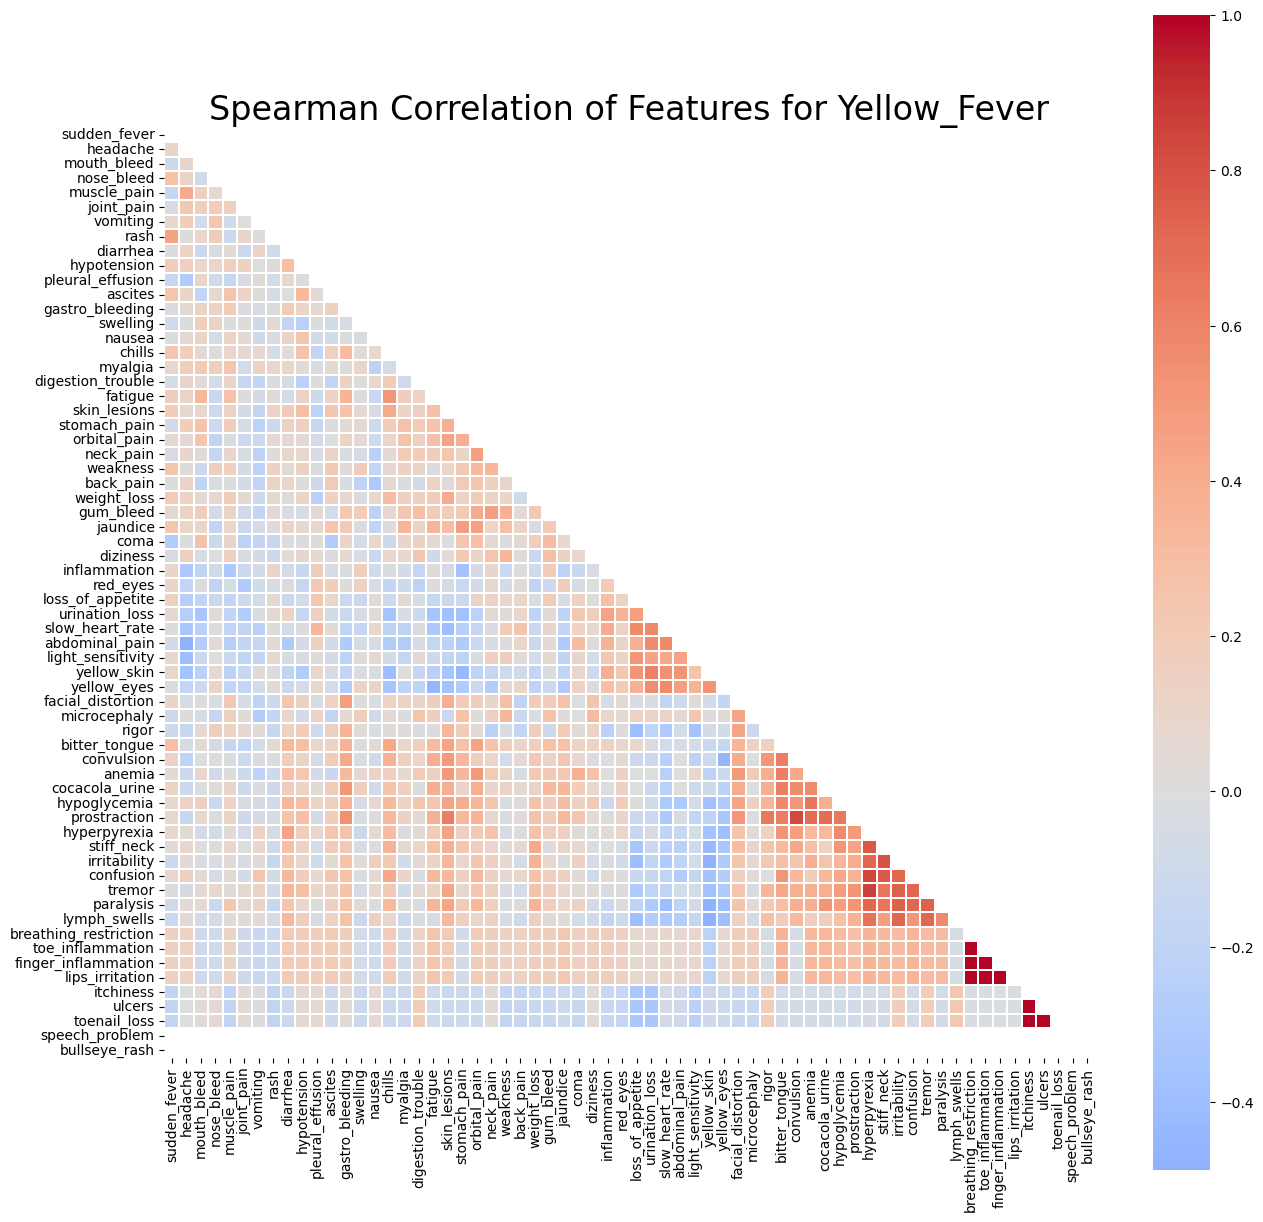

In [10]:
%%time

features = (train_df.columns)[1:-1] #select columns to be used
correlation_matrix = train_df[features].corr(method="spearman") #create correlation matrix

# create heatmap
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(
    correlation_matrix, 
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)), 
    cmap=sns.color_palette("coolwarm", as_cmap=True), 
    center=0,
    square=True, 
    linewidths=.1, 
    cbar=True,
    ax=ax,
    annot=False,
)
ax = ax.set_title("Spearman Correlation of Features", fontsize=24) 


disease="Yellow_Fever"#input('Print enter name of disease you are interested in') or "Maleria"
disease_df = (train_df[train_df['prognosis']==disease]) #    mdailypowerdf1=mdailypowerdf[mdailypowerdf['Weekday']==int(filterday)]

correlation_matrix = disease_df[features].corr(method="spearman") #create correlation matrix
# create heatmap
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(
    correlation_matrix, 
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)), 
    cmap=sns.color_palette("coolwarm", as_cmap=True), 
    center=0,
    square=True, 
    linewidths=.1, 
    cbar=True,
    ax=ax,
    annot=False,
)
title=str("Spearman Correlation of Features for " + disease)
ax = ax.set_title(title, fontsize=24) 

## Coming Next!

Hopefully you will have found this notebook interesting, but its far from finished, over the next couple of weeks I intend to add a basic categorisation to get a baseline of what the raw data produces, I will then build on that by exploring whether there in any opportunity for looking at feature importance and feature engoineering, moving on to trying some parameter hypertuning and ensemble methods, SO please checkback in later!

# Credit where credits due

@sergiosaharovskiy (https://www.kaggle.com/sergiosaharovskiy) has created a really thorogh EDA with Submission https://www.kaggle.com/code/sergiosaharovskiy/ps-s3e13-2023-eda-and-submission